In [ ]:
############################################################
# Import Dependencies
############################################################

import numpy as np

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [63]:
##########################################
# Read CSV Files
##########################################

# Sensor names, labels for SB 35W from 694 to 494
sensor_list = 'Station_Keys/Southbound_35W_StationNames.csv'
SensorList = pd.read_csv(sensor_list)
SensorDF = pd.DataFrame(SensorList)

# Oct_data from a single day showing SB 35W Traffic
oct_data = ('Archived_Data_MNDOT/SB35W_Oct_3_18_Volume_Sum_RushHours.csv')
Oct_cvs = pd.read_csv(oct_data)
OctDF = pd.DataFrame(Oct_cvs)

#Sensor names, labels for NB 35W from 494 to 694
nbsensor_list = 'Station_Keys/Northbound_35W_StationNames.csv'
nbSensorList = pd.read_csv(nbsensor_list)
NBSensorDF = pd.DataFrame(nbSensorList)

# Oct_data from a single day showing NB 35W Traffic
nboct_data = 'Archived_Data_MNDOT/NB35W_Oct_3_18_Volume_Sum_RushHours.csv'
nboct_csv = pd.read_csv(nboct_data)
NBOctDF = pd.DataFrame(nboct_csv)

mpls_csv = 'Station_Keys/MPLS_Route_StationNames.csv'
mpls_csvR = pd.read_csv(mpls_csv)
mpls_DF = pd.DataFrame(mpls_csvR)


mpls_data_csv = 'Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates_2.csv'
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'str', 'col5':'str', 'col6':'float', 'col7':'float'}
parse_dates = ['Date']
mpls_data = pd.read_csv(mpls_data_csv, sep=',', dtype=dtypes, parse_dates=parse_dates)
mpls_dataDF = pd.DataFrame(mpls_data)

############################################################
# Merge CSV Files to create South Bound 35W Data (SB_Data)
############################################################

#Merged SB 35W Data and Labels
SB_Data = pd.merge(SensorDF, OctDF, how = 'left', on = '1')

#Merged NB 35W Data and Labels
NB_Data = pd.merge(NBSensorDF, NBOctDF, how = 'left', on = '1')

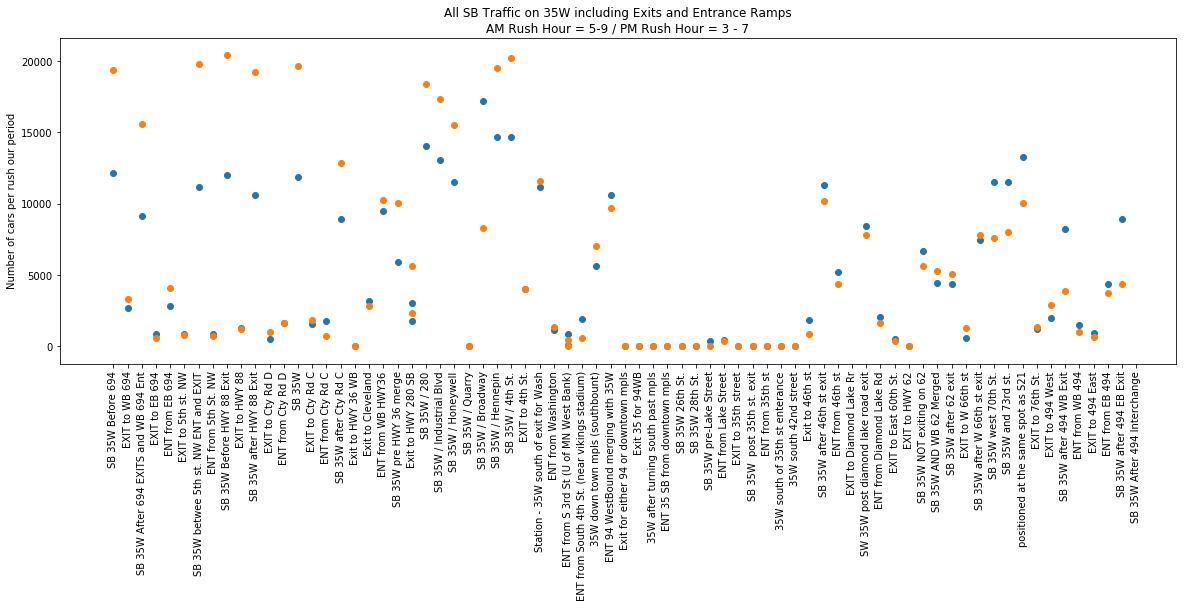

In [64]:
##################################
# SB 35W All Traffic Scatter Plot
##################################

y1 = SB_Data['AM Rush']
y2 = SB_Data['PM Rush']
X_Axis = SB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All SB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

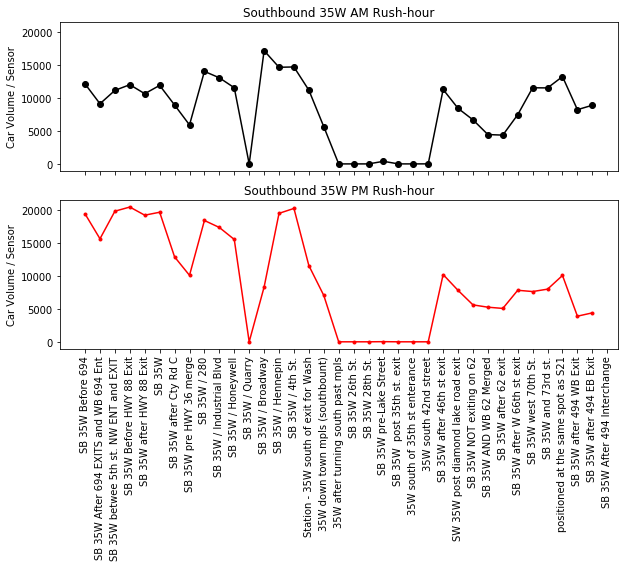

In [65]:
##########################################
#Groupby to display flowing traffic only
##########################################

SB35W_Flow = SB_Data.loc[SB_Data['Type']=='Flow']

# Inputs
y1 = SB35W_Flow ['AM Rush']
y2 = SB35W_Flow['PM Rush']
x1 = SB35W_Flow['Label']
x2 = SB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Southbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Southbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

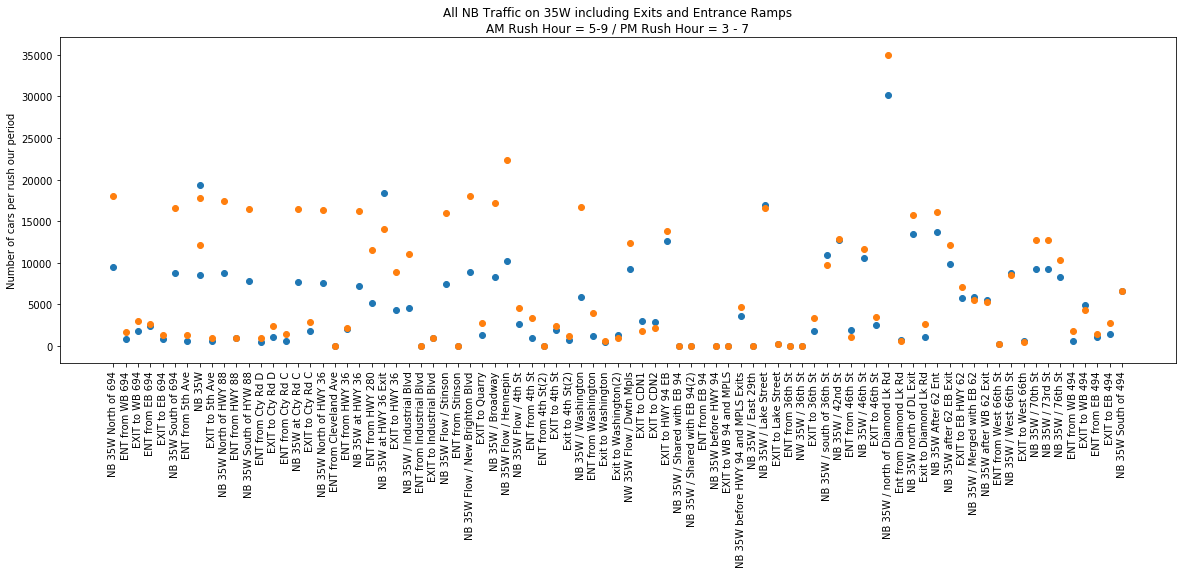

In [66]:
##########################################
# NB 35W All Traffic Scatter Plot
##########################################

y1 = NB_Data['AM_RushHour']
y2 = NB_Data['PM_RushHour']
X_Axis = NB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All NB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

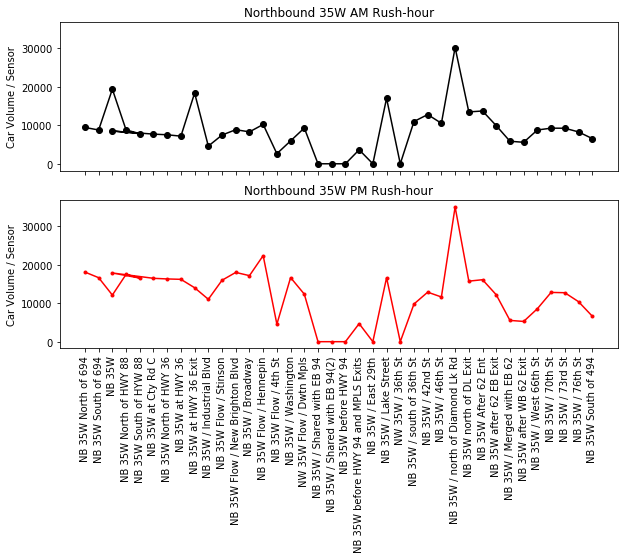

In [67]:
##########################################
#Groupby to display flowing traffic only
##########################################

NB35W_Flow = NB_Data.loc[NB_Data['Type']=='Flow']

# Inputs
y1 = NB35W_Flow ['AM_RushHour']
y2 = NB35W_Flow['PM_RushHour']
x1 = NB35W_Flow['Label']
x2 = NB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Northbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Northbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

In [68]:
################################################################
# Identify 35W Southbound EXITS WITH HIGHEST volume of traffic
################################################################

SB35W_Exits = SB_Data.loc[SB_Data['Type']!='Flow']
SB35W_ExitsDF = SB35W_Exits[['Label', 'Type', 'AM Rush']]
SB35W_ExitsHigh = SB35W_ExitsDF.sort_values(by='AM Rush', ascending=False).head(5)

SB35W_ExitsDFpm = SB35W_Exits[['Label', 'Type', 'PM Rush']]
SB35W_ExitsHighpm = SB35W_ExitsDFpm.sort_values(by='PM Rush', ascending=False).head(5)

display_side_by_side(SB35W_ExitsHigh, SB35W_ExitsHighpm)

,Label,Type,AM Rush
37,ENT 94 WestBound merging with 35W,On,10594.0
19,ENT from WB HWY36,On,9510.0
53,ENT from 46th st,On,5214.0
72,ENT from EB 494,On,4377.0
30,EXIT to 4th St.,Exit,4012.0
,Label,Type,PM Rush
19,ENT from WB HWY36,On,10265.0
37,ENT 94 WestBound merging with 35W,On,9691.0
22,Exit to HWY 280 SB,Exit,5616.0
53,ENT from 46th st,On,4369.0


In [69]:
################################################################
# Identify 35W Northbound EXITS WITH HIGHEST volume of traffic
################################################################

NB35W_Exits = NB_Data.loc[NB_Data['Type']!='Flow']
NB35W_ExitsDF = NB35W_Exits[['Label', 'Type', 'AM_RushHour']]
NB35W_ExitsHigh = NB35W_ExitsDF.sort_values(by='AM_RushHour', ascending=False).head(5)

NB35W_ExitsDFpm = NB35W_Exits[['Label', 'Type', 'PM_RushHour']]
NB35W_ExitsHighpm = NB35W_ExitsDFpm.sort_values(by='PM_RushHour', ascending=False).head(5)

display_side_by_side(NB35W_ExitsHigh, NB35W_ExitsHighpm)

,Label,Type,AM_RushHour
46,EXIT to HWY 94 EB,Exit,12572.0
70,EXIT to EB HWY 62,Exit,5771.0
22,ENT from HWY 280,On,5150.0
80,EXIT to WB 494,Exit,4990.0
24,EXIT to HWY 36,Exit,4317.0
,Label,Type,PM_RushHour
46,EXIT to HWY 94 EB,Exit,13824.0
22,ENT from HWY 280,On,11584.0
24,EXIT to HWY 36,Exit,8880.0
70,EXIT to EB HWY 62,Exit,7072.0


In [70]:
###
# Avg of mpls in and out of mpls

avg_vol = mpls_dataDF.groupby(['St Label'])

avg_vol_sen = pd.DataFrame(avg_vol['Volume'].agg(np.mean)).sort_values(by='Volume', ascending = False)
avg_vol_sen

,Volume
St Label,
EB 94 from dwtn,68985.333333
WB 94 to dwtn,65923.333333
WB 394 from dwtn,56064.500000
SB 35W to dwtn,53735.416667
EB 394 to dwtn,53167.583333
NB 35W from dwtn,48368.750000
EB 94 to dwtn,35792.416667
SB 35W from dwtn,34063.333333
WB 94 from dwtn,32459.833333


In [74]:
##################################
# Packers at Vikings 10/15/2017
##################################

VikPak_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Packers at Vikings']
VikPak = VikPak_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
VikPak_to = VikPak.loc[VikPak['Direction']=='To']
VikPak_Tosorted = VikPak_to.sort_values(by = 'Freeway Tag', ascending = True)

VikPak_From = VikPak.loc[VikPak['Direction']=='From']
VikPak_Fromsorted = VikPak_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(VikPak_Tosorted, VikPak_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
61,28958,EB 94 to dwtn,To,1
69,33427,NB 35W to dwtn,To,2
64,48752,EB 394 to dwtn,To,3
65,57976,WB 94 to dwtn,To,4
68,53712,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
60,28521,WB 94 from dwtn,From,1
62,37519,SB 35W from dwtn,From,2
63,47075,WB 394 from dwtn,From,3
66,57503,EB 94 from dwtn,From,4


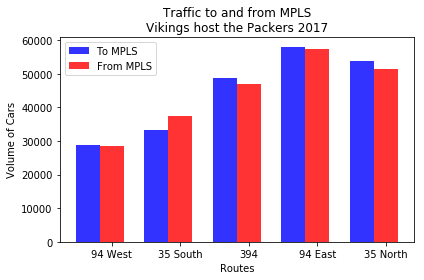

In [75]:
#########################################
#Visualization of Vikes Pac game 2017
#########################################

n_groups = 5
VikPak_trafficTo = list(VikPak_Tosorted['Volume'])
VikPak_TrafficFr = list(VikPak_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, VikPak_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, VikPak_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')

plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nVikings host the Packers 2017')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()

plt.tight_layout()
plt.show()